In [1]:
import pandas as pd

## Load data

In [2]:
df = pd.read_csv("../../data/steam_games.csv")
df.head()

,app_name,developer,discount_price,early_access,genres,id,metascore,price,publisher,release_date,reviews_url,sentiment,specs,tags,title,url
0,Lost Summoner Kitty,Kotoshiro,4.49,False,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",761140.0,NaN,4.99,Kotoshiro,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,NaN,['Single-player'],"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...
1,Ironbound,Secret Level SRL,NaN,False,"['Free to Play', 'Indie', 'RPG', 'Strategy']",643980.0,NaN,Free To Play,Making Fun Inc.,2018-01-04,http://steamcommunity.com/app/643980/reviews/?...,Mostly Positive,"['Single-player', 'Multi-player', 'Online Mult...","['Free to Play', 'Strategy', 'Indie', 'RPG', '...",Ironbound,http://store.steampowered.com/app/643980/Ironb...
2,Real Pool 3D - Poolians,Poolians.com,NaN,False,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",670290.0,NaN,Free to Play,Poolians.com,2017-07-24,http://steamcommunity.com/app/670290/reviews/?...,Mostly Positive,"['Single-player', 'Multi-player', 'Online Mult...","['Free to Play', 'Simulation', 'Sports', 'Casu...",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...
3,弹炸人2222,彼岸领域,0.83,False,"['Action', 'Adventure', 'Casual']",767400.0,NaN,0.99,彼岸领域,2017-12-07,http://steamcommunity.com/app/767400/reviews/?...,NaN,['Single-player'],"['Action', 'Adventure', 'Casual']",弹炸人2222,http://store.steampowered.com/app/767400/2222/
4,Log Challenge,NaN,1.79,False,NaN,773570.0,NaN,2.99,NaN,NaN,http://steamcommunity.com/app/773570/reviews/?...,NaN,"['Single-player', 'Full controller support', '...","['Action', 'Indie', 'Casual', 'Sports']",NaN,http://store.steampowered.com/app/773570/Log_C...


In [3]:
print(df.isnull().sum())

app_name              2
developer          3299
discount_price    31910
early_access          0
genres             3283
id                    2
metascore         29528
price              1377
publisher          8071
release_date       2067
reviews_url           2
sentiment          7182
specs               670
tags                163
title              2050
url                   0
dtype: int64


In [4]:
# Fix missing values

# App name and title are the same, replace missing values in title with app name and vice versa
df['title'] = df['title'].fillna(df['app_name'])
df['app_name'] = df['app_name'].fillna(df['title'])

# If both app name and title are missing, drop the row
df = df.dropna(subset=['app_name', 'title'])

# Replace missing values in developer and publisher with 'Unknown'
df['developer'] = df['developer'].fillna('Unknown')
df['publisher'] = df['publisher'].fillna('Unknown')

# Replace missing genres with "[]"
df['genres'] = df['genres'].fillna('[]')

# Remove a game if it has no id
df = df.dropna(subset=['id'])

# Remove a game if it has no release date
df = df.dropna(subset=['release_date'])

# If the price value is "Free to Play", replace it with 0
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'] = df['price'].fillna(0)

# Remove the discount column as most do not have it
df = df.drop(columns=['discount_price', 'metascore', 'sentiment'])

# Remove rows if they are missing tags and specs
df = df.dropna(subset=['tags', 'specs'])

print(df.isnull().sum())

app_name        0
developer       0
early_access    0
genres          0
id              0
price           0
publisher       0
release_date    0
reviews_url     0
specs           0
tags            0
title           0
url             0
dtype: int64


## Save processed games

In [5]:

df.to_csv("../../data/final/steam_games_final.csv", index=False)

## Exploratory data analysis

In [61]:
df.describe()

,id,price
count,2.924500e+04,29245.000000
mean,4.429451e+05,8.236839
std,1.846980e+05,14.364484
min,1.000000e+01,0.000000
25%,3.203200e+05,1.990000
50%,4.370200e+05,4.990000
75%,5.880400e+05,9.990000
max,2.028850e+06,995.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29245 entries, 0 to 32133
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_name      29245 non-null  object 
 1   developer     29245 non-null  object 
 2   early_access  29245 non-null  bool   
 3   genres        29245 non-null  object 
 4   id            29245 non-null  float64
 5   price         29245 non-null  float64
 6   publisher     29245 non-null  object 
 7   release_date  29245 non-null  object 
 8   reviews_url   29245 non-null  object 
 9   specs         29245 non-null  object 
 10  tags          29245 non-null  object 
 11  title         29245 non-null  object 
 12  url           29245 non-null  object 
dtypes: bool(1), float64(2), object(10)
memory usage: 2.9+ MB


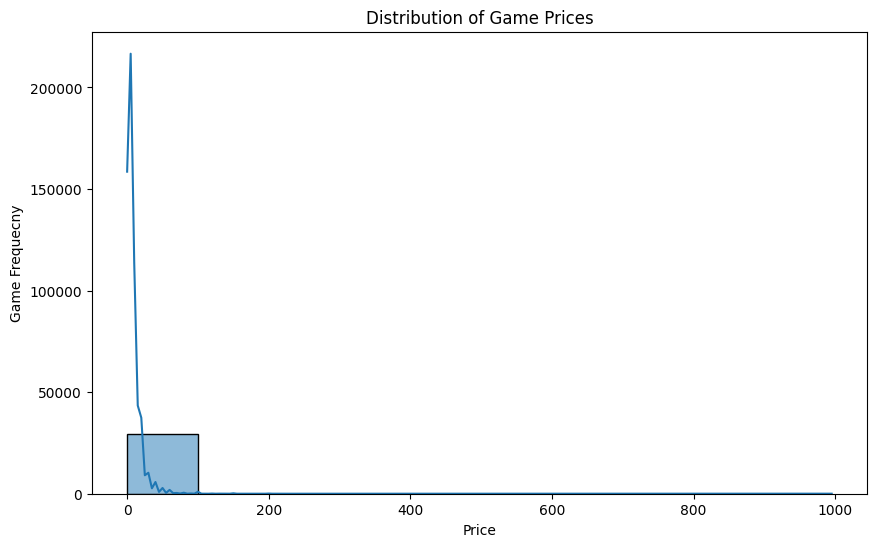

In [69]:
# Let us view the range of games we are looking at starting with price
import matplotlib.pyplot as plt
import seaborn as sns

# It was not provided as to which currency the prices are in
# Plot price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Distribution of Game Prices')
plt.xlabel('Price')
plt.ylabel('Game Frequecny')
plt.show()

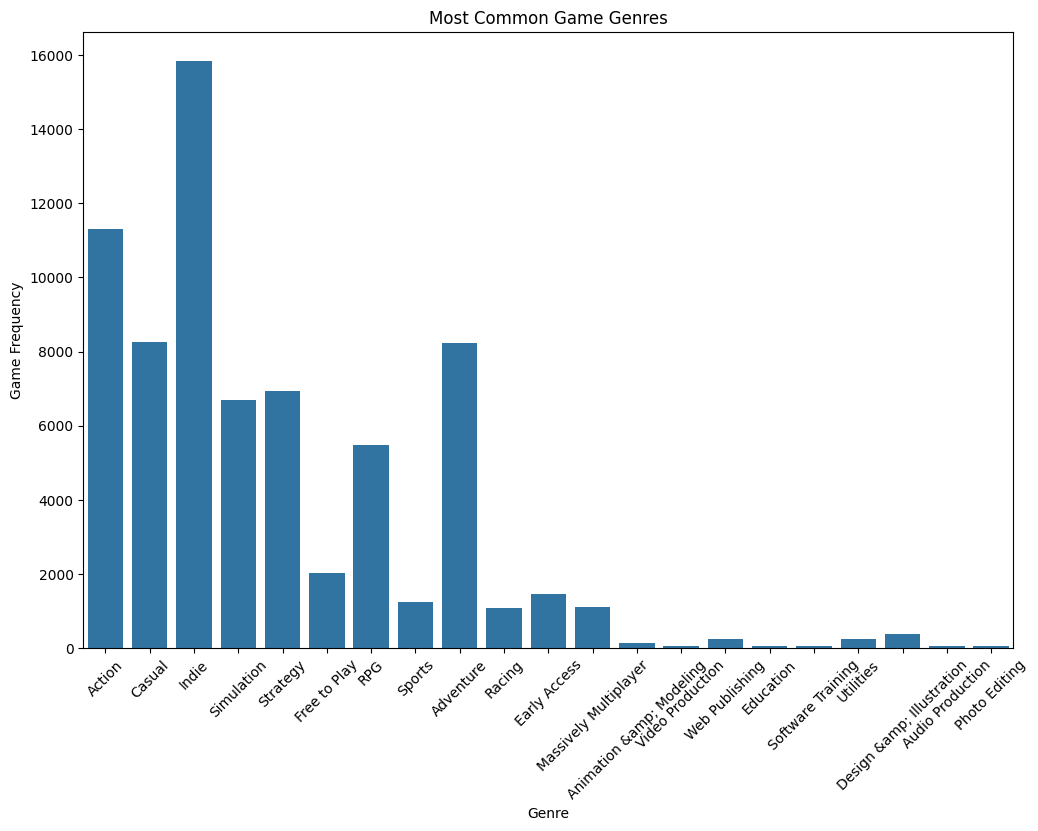

In [73]:
from collections import Counter

# Split genres to be plotted
genres = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])
genre_counts = Counter([genre for sublist in genres for genre in sublist])

# Lets us view the most common genres in descending order
# - labels overlapped when using this order; will sort in ascending order for a clearer plot
# genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

# Plot genre popularity
plt.figure(figsize=(12, 8))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.title('Most Common Game Genres')
plt.xlabel('Genre')
plt.ylabel('Game Frequency')
plt.xticks(rotation=45)
plt.show()

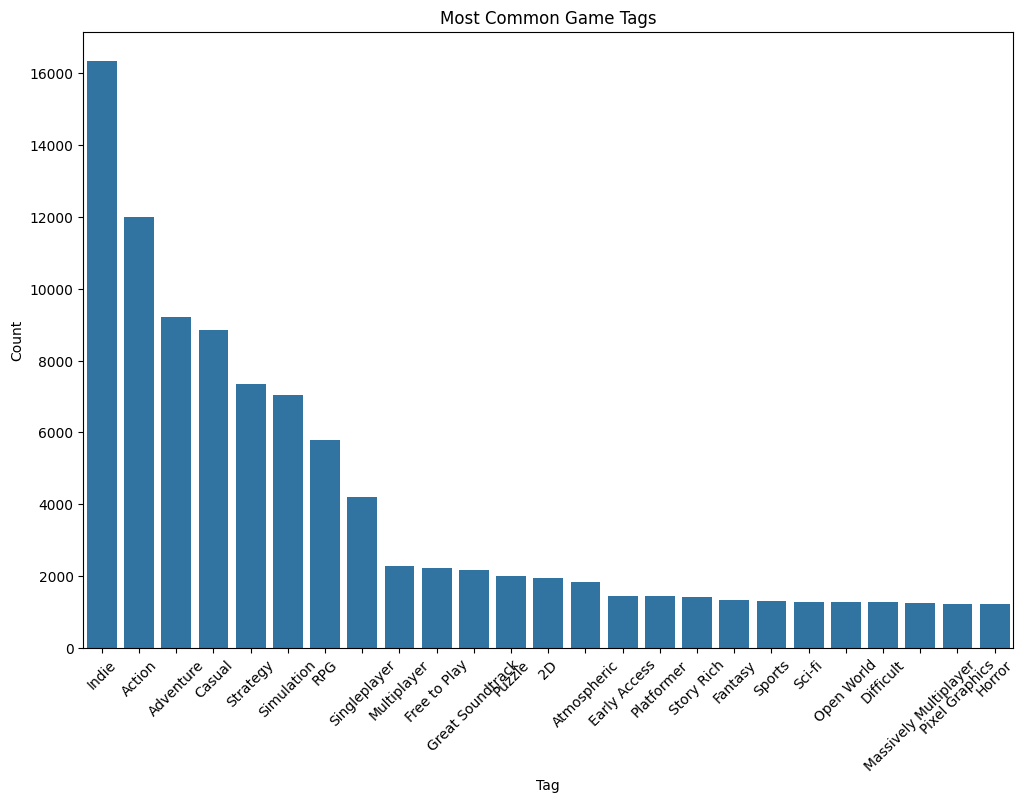

In [77]:
# Split tags and count occurrences
tags = df['tags'].apply(lambda x: eval(x) if isinstance(x, str) else [])
tag_counts = Counter([tag for sublist in tags for tag in sublist])

# Lets view the top 20 tags
tag_counts = dict(sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)[:25])

# Plot tag frequency
plt.figure(figsize=(12, 8))
sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()))
plt.title('Most Common Game Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Seems like tags and genres are very similar. It is not clear as to why we would need both.

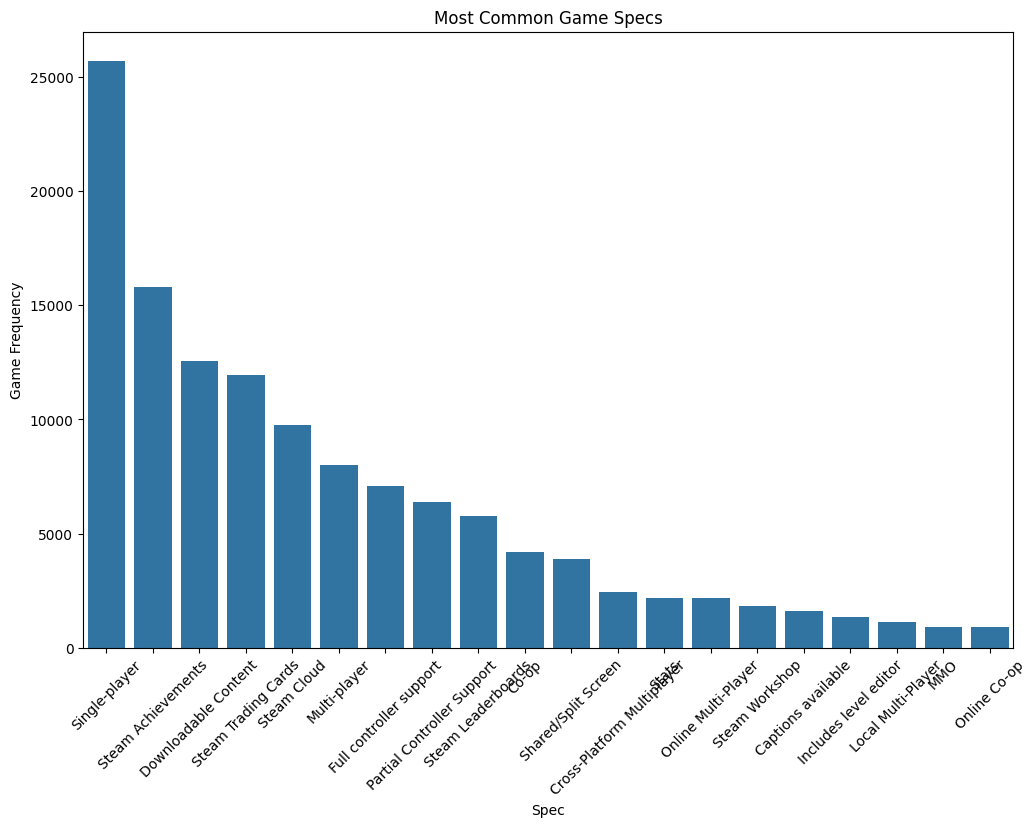

In [80]:
# Split specs and count occurrences
specs = df['specs'].apply(lambda x: eval(x) if isinstance(x, str) else [])
spec_counts = Counter([spec for sublist in specs for spec in sublist])

# Lets view the top 20 tags
spec_counts = dict(sorted(spec_counts.items(), key=lambda x: x[1], reverse=True)[:20])

# Plot tag frequency
plt.figure(figsize=(12, 8))
sns.barplot(x=list(spec_counts.keys()), y=list(spec_counts.values()))
plt.title('Most Common Game Specs')
plt.xlabel('Spec')
plt.ylabel('Game Frequency')
plt.xticks(rotation=45)
plt.show()

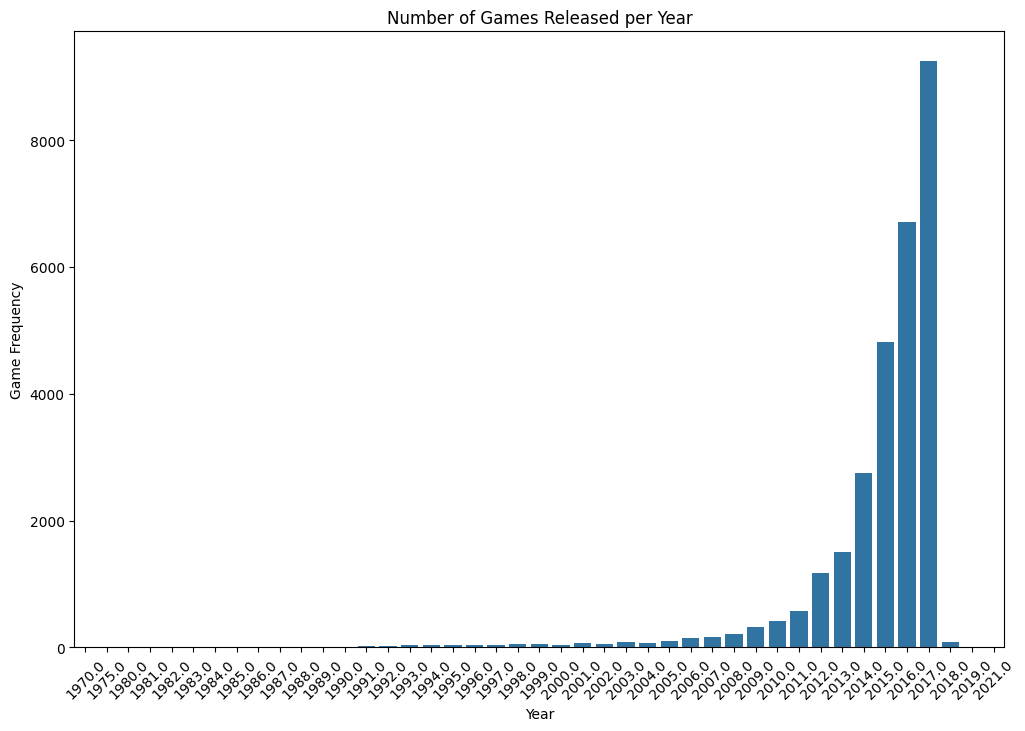

In [85]:
# Let us plot the number of games released per year from our data
df_dates = df.copy()

df_dates['release_date'] = pd.to_datetime(df_dates['release_date'], yearfirst=True, errors='coerce')
df_dates['year'] = df_dates['release_date'].dt.year

# Plot number of games released per year
plt.figure(figsize=(12, 8))
sns.countplot(x='year', data=df_dates)
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Game Frequency')
plt.xticks(rotation=45)
plt.show()

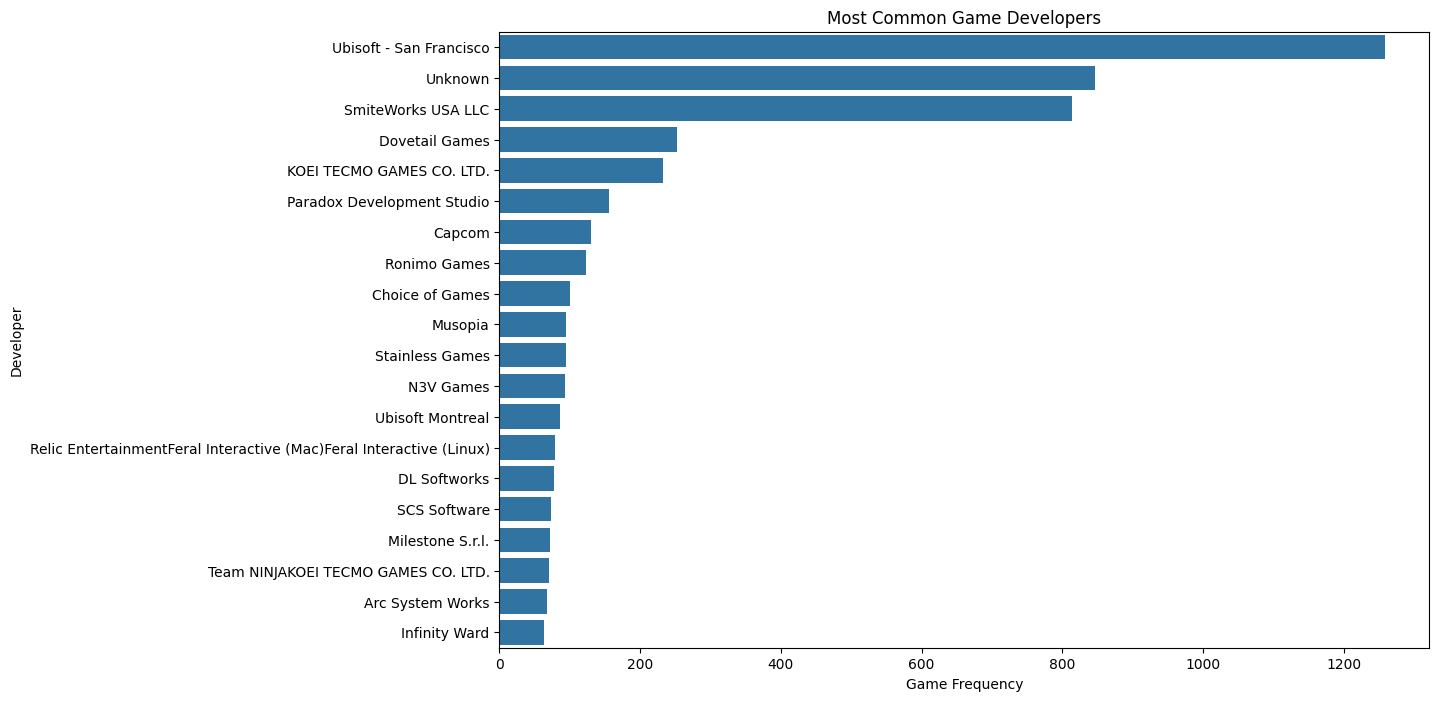

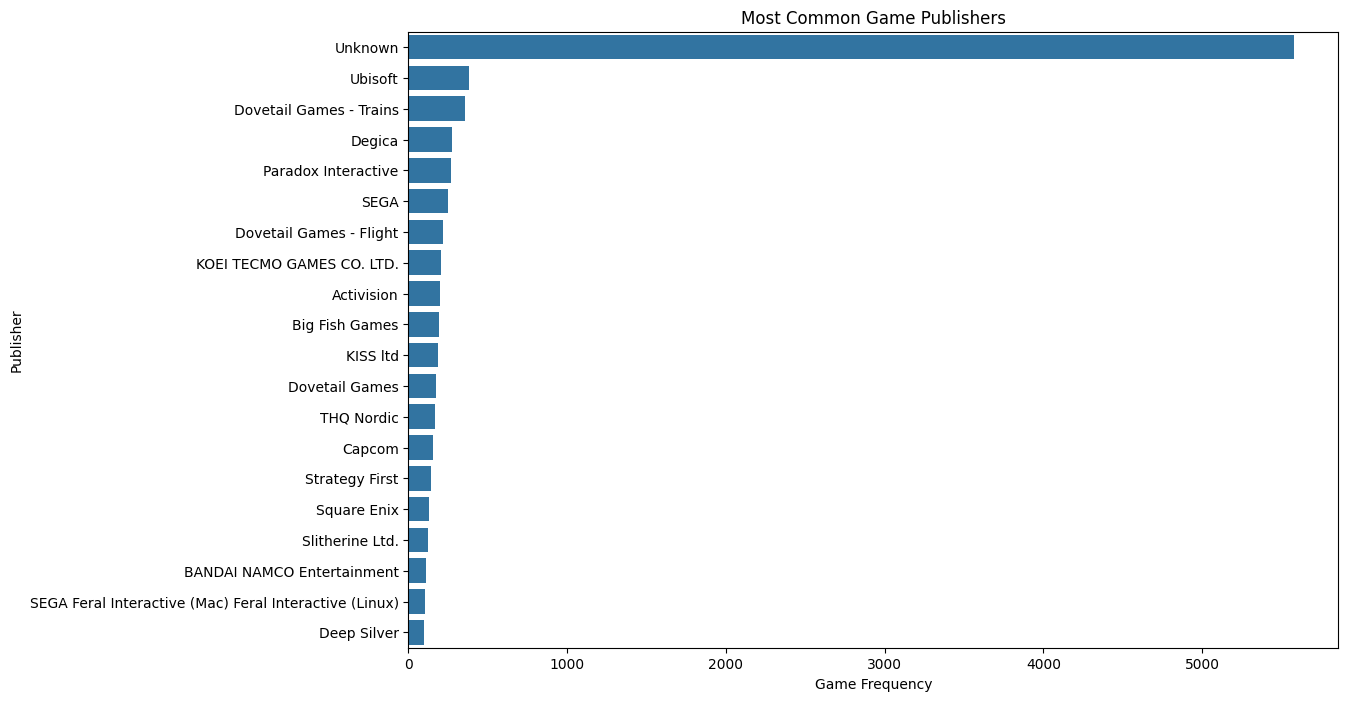

In [ ]:
# There may be cases where the publisher and developer are not the same. Lets view them individually

# Find the most common developers
developers = df['developer'].value_counts().head(20)

# Plot the most common developers
plt.figure(figsize=(12, 8))
sns.barplot(x=developers.values, y=developers.index)
plt.title('Most Common Game Developers')
plt.xlabel('Game Frequency')
plt.ylabel('Developer')
plt.show()

# Find the most common publishers
publishers = df['publisher'].value_counts().head(20)

# Plot the most common publishers
plt.figure(figsize=(12, 8))
sns.barplot(x=publishers.values, y=publishers.index)
plt.title('Most Common Game Publishers')
plt.xlabel('Game Frequency')
plt.ylabel('Publisher')
plt.show()
